# Project

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (metrics,
                     model_selection as skms,
                     naive_bayes, neighbors)
from sklearn.naive_bayes import GaussianNB

In [70]:
import warnings
warnings.filterwarnings('ignore')

,ExonIntron,CpG_site,WT_AA,Mutant_AA,Effect,Hotspot,Residue_function,Domain_function,SIFTClass
0,2-exon,no,Glu,Lys,missense,no,,Transactivation TAD1,Damaging
1,2-exon,no,Glu,Gln,missense,no,,Transactivation TAD1,Tolerated
2,2-exon,no,Glu,Ala,missense,no,,Transactivation TAD1,Damaging
3,2-exon,no,Glu,Gly,missense,no,,Transactivation TAD1,Damaging
4,2-exon,no,Glu,Val,missense,no,,Transactivation TAD1,Damaging
...,...,...,...,...,...,...,...,...,...
7988,4-exon,no,Phe,,missense,yes,Buried,DNA binding,Damaging
7989,4-exon,no,Ala,Gly,missense,no,DNA binding,DNA binding,Damaging
7990,4-exon,no,Pro,Pro-Ser,missense,no,,SH3-like/Pro-rich,Tolerated
7991,7-exon,no,Ile,Asn,missense,yes,Buried,DNA binding,Damaging


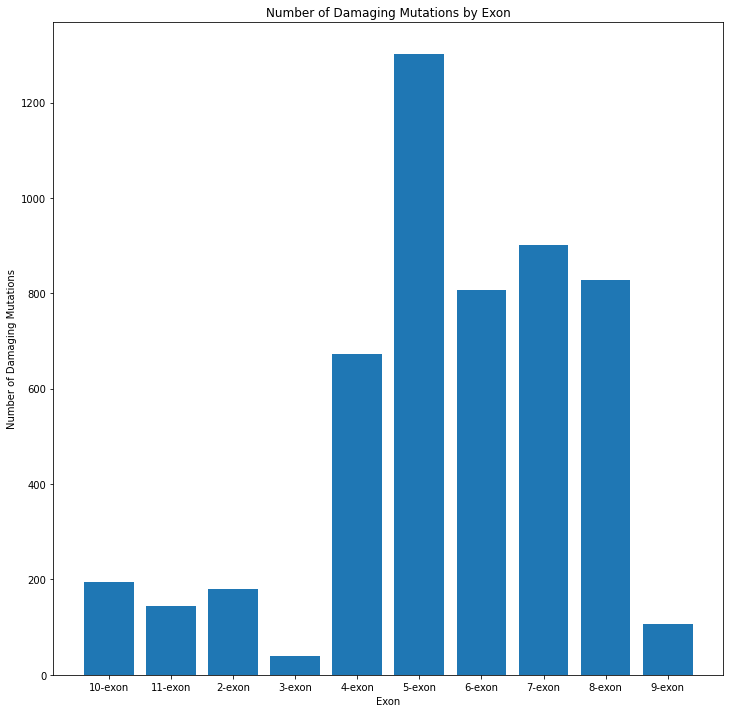

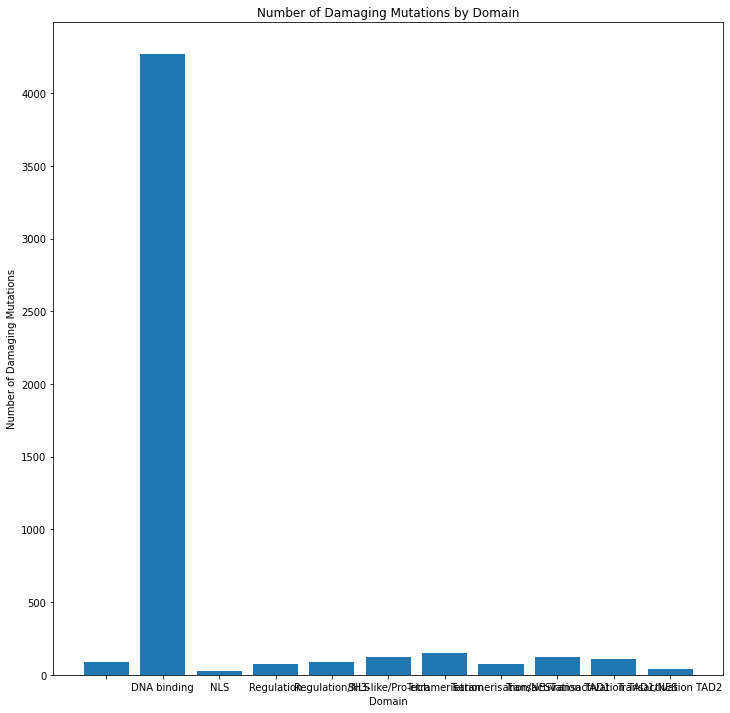

In [71]:
data = pd.read_csv('geneVariationsTP53.txt', sep="\t", header=0)
data = data.iloc[:, 4:]

data = data.drop('Codon_number', 1)
data = data.drop('Description', 1)
data = data.drop('ProtDescription', 1)
data = data.drop('c_description', 1)
data = data.drop('g_description', 1)
data = data.drop('g_description_GRCh38', 1)
data = data.drop('hgvs_hg19', 1)
data = data.drop('hgvs_hg38', 1)
data = data.drop('hgvs_NM_000546', 1)
data = data.drop('Splice_site', 1)
data = data.drop('Structural_motif', 1)
data = data.drop('Context_coding_3', 1)
data = data.drop('Type', 1)
data = data.drop('WT_nucleotide', 1)
data = data.drop('Mutant_nucleotide', 1)
data = data.drop('Mut_rate', 1)
data = data.drop('WT_codon', 1)
data = data.drop('Mutant_codon', 1)
data = data.drop('Mut_rateAA', 1)
data = data.drop('Polymorphism', 1)
data = data.drop('COSMIClink', 1)
data = data.drop('CLINVARlink', 1)
data = data.drop('TCGA_ICGC_GENIE_count', 1)
data = data.drop('SNPlink', 1)
data = data.drop('gnomADlink', 1)
data = data.drop('SourceDatabases', 1)
data = data.drop('PubMedlink', 1)
# data = data.drop('Domain_function', 1)
data = data.drop('SA', 1)
data = data.drop('DNE_LOFclass', 1)
data = data.drop('DNEclass', 1)
data = data.drop('EffectGroup3', 1)
data = data.drop('SwissProtLink', 1)
data = data.drop('WAF1nWT', 1)
data = data.drop('MDM2nWT', 1)
data = data.drop('BAXnWT', 1)
data = data.drop('h1433snWT', 1)
data = data.drop('AIP1nWT', 1)
data = data.drop('GADD45nWT', 1)
data = data.drop('NOXAnWT', 1)
data = data.drop('P53R2nWT', 1)
data = data.drop('AAchange', 1)
data = data.drop('WAF1nWT_Saos2', 1)
data = data.drop('MDM2nWT_Saos2', 1)
data = data.drop('BAXnWT_Saos2', 1)
data = data.drop('h1433snWT_Saos2', 1)
data = data.drop('AIP1nWT_Saos2', 1)
data = data.drop('PUMAnWT_Saos2', 1)
data = data.drop('SubG1nWT_Saos2', 1)
data = data.drop('Type_ID', 1)
data = data.drop('AAchange_ID', 1)
data = data.drop('MutationView_ID', 1)
data = data.drop('Somatic_count', 1)
data = data.drop('Germline_count', 1)
data = data.drop('CellLine_count', 1)
data = data.drop('TransactivationClass', 1)
data = data.drop('StructureFunctionClass', 1)

target = data.SIFTClass

# target = data.AGVGDClass
# target = data.Polyphen2
# target = data.BayesDel
# target = data.REVEL

#data = data.drop('SIFTClass', 1)
data = data.drop('AGVGDClass', 1)
data = data.drop('Polyphen2', 1)
data = data.drop('BayesDel', 1)
data = data.drop('REVEL', 1)

# AGVGD class == SIFT class == Polyphen2 == BayesDel == REVEL == TransactivationClass

# Effect Group 3
# Mutation classification based on protein 3D structure and mutation type. 
# This classification has been used to derive gentoype-phenotype correlations in sporadic breast cancers 
# (Olivier et al., 2006).
# 0=silent+intron;
# 1=missense in DNA-binding loops(L2,H1,L3,L1,S2,S2',H2);
# 2=other missense;
# 3=inFrame del/ins;
# 4=FS+splice+nonsense.
data.fillna('', inplace=True)

display(data)

counts = []
for e in np.unique(data.ExonIntron):
    d = data[data["ExonIntron"] == e]
    c = d['SIFTClass'].value_counts()
    counts.append(c["Damaging"])
    
counts2 = []
for domain in np.unique(data.Domain_function):
    d = data[data["Domain_function"] == domain]
    c = d['SIFTClass'].value_counts()
    counts2.append(c["Damaging"])

plt.figure(figsize=(12, 12))

plt.bar(np.unique(data.ExonIntron), counts)
plt.xlabel("Exon")
plt.ylabel("Number of Damaging Mutations")
plt.title("Number of Damaging Mutations by Exon")

plt.show()

plt.figure(figsize=(12, 12))

plt.bar(np.unique(data.Domain_function), counts2)
plt.xlabel("Domain")
plt.ylabel("Number of Damaging Mutations")
plt.title("Number of Damaging Mutations by Domain")

plt.show()

In [72]:
data["CpG_site"].replace({"no": 0, "yes": 1}, inplace=True)
data["Hotspot"].replace({"no": 0, "yes": 1}, inplace=True)
data["Effect"].replace({"missense": 0, "silent": 1, "splice": 2}, inplace=True)
data["ExonIntron"].replace({'2-exon': 2, '3-exon': 3, '4-exon': 4, '5-exon': 5, '6-exon': 6, '7-exon': 7, 
                        '8-exon': 8, '9-exon': 9, '10-exon': 10, '11-exon': 11}, inplace=True)
data["Residue_function"].replace({'': 0, 'ADP-ribosylation': 1, 'ADP-ribosylation site': 2, 
                                  'Acetylation site': 3, 'Acetylation/Methylation/Ubiquitination site': 4, 
                                  'Acetylation/Ubiquitination site': 5, 'Buried': 6, 'DNA binding': 7,
                                  'Exposed': 8, 'Isoaspartyl methylation site': 9, 'Methylation site': 10,
                                  'Nitration': 11, 'Partially exposed': 12, 'Phosphorylation site': 13, 
                                  'Phosphorylation/O-GlcNAcylation site': 14, 'S-glutathionylation site': 15,
                                  'Sumoylation/Ubiquitination site': 16, 'Tetramerisation': 17,
                                  'Tetramerisation/Methylation site': 18, 'Transactivation': 19,
                                  'Ubiquitination site': 20, 'Zn binding': 21}, inplace=True)
data["Domain_function"].replace({'': 0, 'DNA binding': 1, 'NLS': 2, 'Regulation': 3, 'Regulation/NLS': 4,
                                 'SH3-like/Pro-rich': 5, 'Tetramerisation': 6, 'Tetramerisation/NES': 7, 
                                 'Transactivation TAD1': 8, 'Transactivation TAD1/NES': 9,
                                 'Transactivation TAD2': 10}, inplace=True)
data["WT_AA"].replace({'Ala': 0, 'Arg': 1, 'Asn': 2, 'Asp': 3, 'Cys': 4, 'Gln': 5, 'Glu': 6, 'Gly': 7,
                       'His': 8, 'Ile': 9, 'Leu': 10, 'Lys': 11, 'Met': 12, 'Phe': 13, 'Pro': 14,
                       'Pro/Arg': 15, 'Ser': 16, 'Thr': 17, 'Trp': 18, 'Tyr': 19, 'Val': 20}, inplace=True)
# data["Mutant_AA"].replace({'': 0, 'Ala': 1, 'Ala-Phe': 2, 'Ala-Ser': 3, 'Ala-Thr': 4, 'Arg': 5, 'Arg-Gln': 6,
#                            'Arg-Phe': 7, 'Arg-Ser': 8, 'Asn': 9, 'Asn-Arg': 10, 'Asn-Asp': 11, 'Asn-Phe': 12,
#                            'Asn-Trp': 13, 'Asp': 14, 'Asp-Trp': 15, 'Cys': 16, 'Cys-Cys': 17, 'Cys-Ser': 18,
#                            'Gln': 19, 'Gln-Ser': 20, 'Glu': 21, 'Glu-Ile': 22, 'Glu-Lys': 23, 'Glu-Met': 24,
#                            'Gly': 25, 'Gly-Cys': 26, 'Gly-His': 27, 'His': 28, 'His-Tyr': 29, 'Ile': 30,
#                            'Ile-His': 31, 'Ile-Phe': 32, 'Ile-Tyr': 33, 'Leu': 34, 'Leu-Arg': 35,
#                            'Leu-Asn': 36, 'Leu-Cys': 37, 'Leu-Lys': 38, 'Leu-Ser': 39, 'Leu-Thr': 40, 
#                            'Lys': 41, 'Met': 42, 'Phe': 43, 'Phe-Cys': 44, 'Phe-Thr': 45, 'Pro': 46,
#                            'Pro-Ser': 47, 'Pro-Tyr': 48, 'Ser': 49, 'Ser-Pro': 50, 'Ser-Ser': 51, 'Thr': 52,
#                            'Thr-Cys': 53, 'Thr-Lys': 54, 'Trp': 55, 'Tyr': 56, 'Val': 57, 'Val-Cys':58,
#                            'Val-Lys': 59, 'Val-Met': 60, 'Val-Ser': 61}, inplace=True)
data["Mutant_AA"].replace({'': 0, 'Ala': 1, 'Ala-Phe': 1, 'Ala-Ser': 1, 'Ala-Thr': 1, 'Arg': 2, 'Arg-Gln': 2,
                           'Arg-Phe': 2, 'Arg-Ser': 2, 'Asn': 3, 'Asn-Arg': 3, 'Asn-Asp': 3, 'Asn-Phe': 3,
                           'Asn-Trp': 3, 'Asp': 4, 'Asp-Trp': 4, 'Cys': 5, 'Cys-Cys': 5, 'Cys-Ser': 5,
                           'Gln': 6, 'Gln-Ser': 6, 'Glu': 7, 'Glu-Ile': 7, 'Glu-Lys': 7, 'Glu-Met': 7,
                           'Gly': 8, 'Gly-Cys': 8, 'Gly-His': 8, 'His': 9, 'His-Tyr': 9, 'Ile': 10,
                           'Ile-His': 10, 'Ile-Phe': 10, 'Ile-Tyr': 10, 'Leu': 11, 'Leu-Arg': 11,
                           'Leu-Asn': 11, 'Leu-Cys': 11, 'Leu-Lys': 11, 'Leu-Ser': 11, 'Leu-Thr': 11, 
                           'Lys': 12, 'Met': 13, 'Phe': 14, 'Phe-Cys': 14, 'Phe-Thr': 14, 'Pro': 15,
                           'Pro-Ser': 15, 'Pro-Tyr': 15, 'Ser': 16, 'Ser-Pro': 16, 'Ser-Ser': 16, 'Thr': 17,
                           'Thr-Cys': 17, 'Thr-Lys': 17, 'Trp': 18, 'Tyr': 19, 'Val': 20, 'Val-Cys': 20,
                           'Val-Lys': 20, 'Val-Met': 20, 'Val-Ser': 20}, inplace=True)

aa = []
for i, r in data.iterrows():
    if r["WT_AA"] == r["Mutant_AA"]:
        aa.append(0)
    else:
        aa.append(1)

data["AA_change"] = aa

data["SIFTClass"].replace({"Damaging": 0, "Tolerated": 1}, inplace=True)

In [73]:
display(data)

,ExonIntron,CpG_site,WT_AA,Mutant_AA,Effect,Hotspot,Residue_function,Domain_function,SIFTClass,AA_change
0,2,0,6,12,0,0,0,8,0,1
1,2,0,6,6,0,0,0,8,1,0
2,2,0,6,1,0,0,0,8,0,1
3,2,0,6,8,0,0,0,8,0,1
4,2,0,6,20,0,0,0,8,0,1
...,...,...,...,...,...,...,...,...,...,...
7988,4,0,13,0,0,1,6,1,0,1
7989,4,0,0,8,0,0,7,1,0,1
7990,4,0,14,15,0,0,0,5,1,1
7991,7,0,9,3,0,1,6,1,0,1


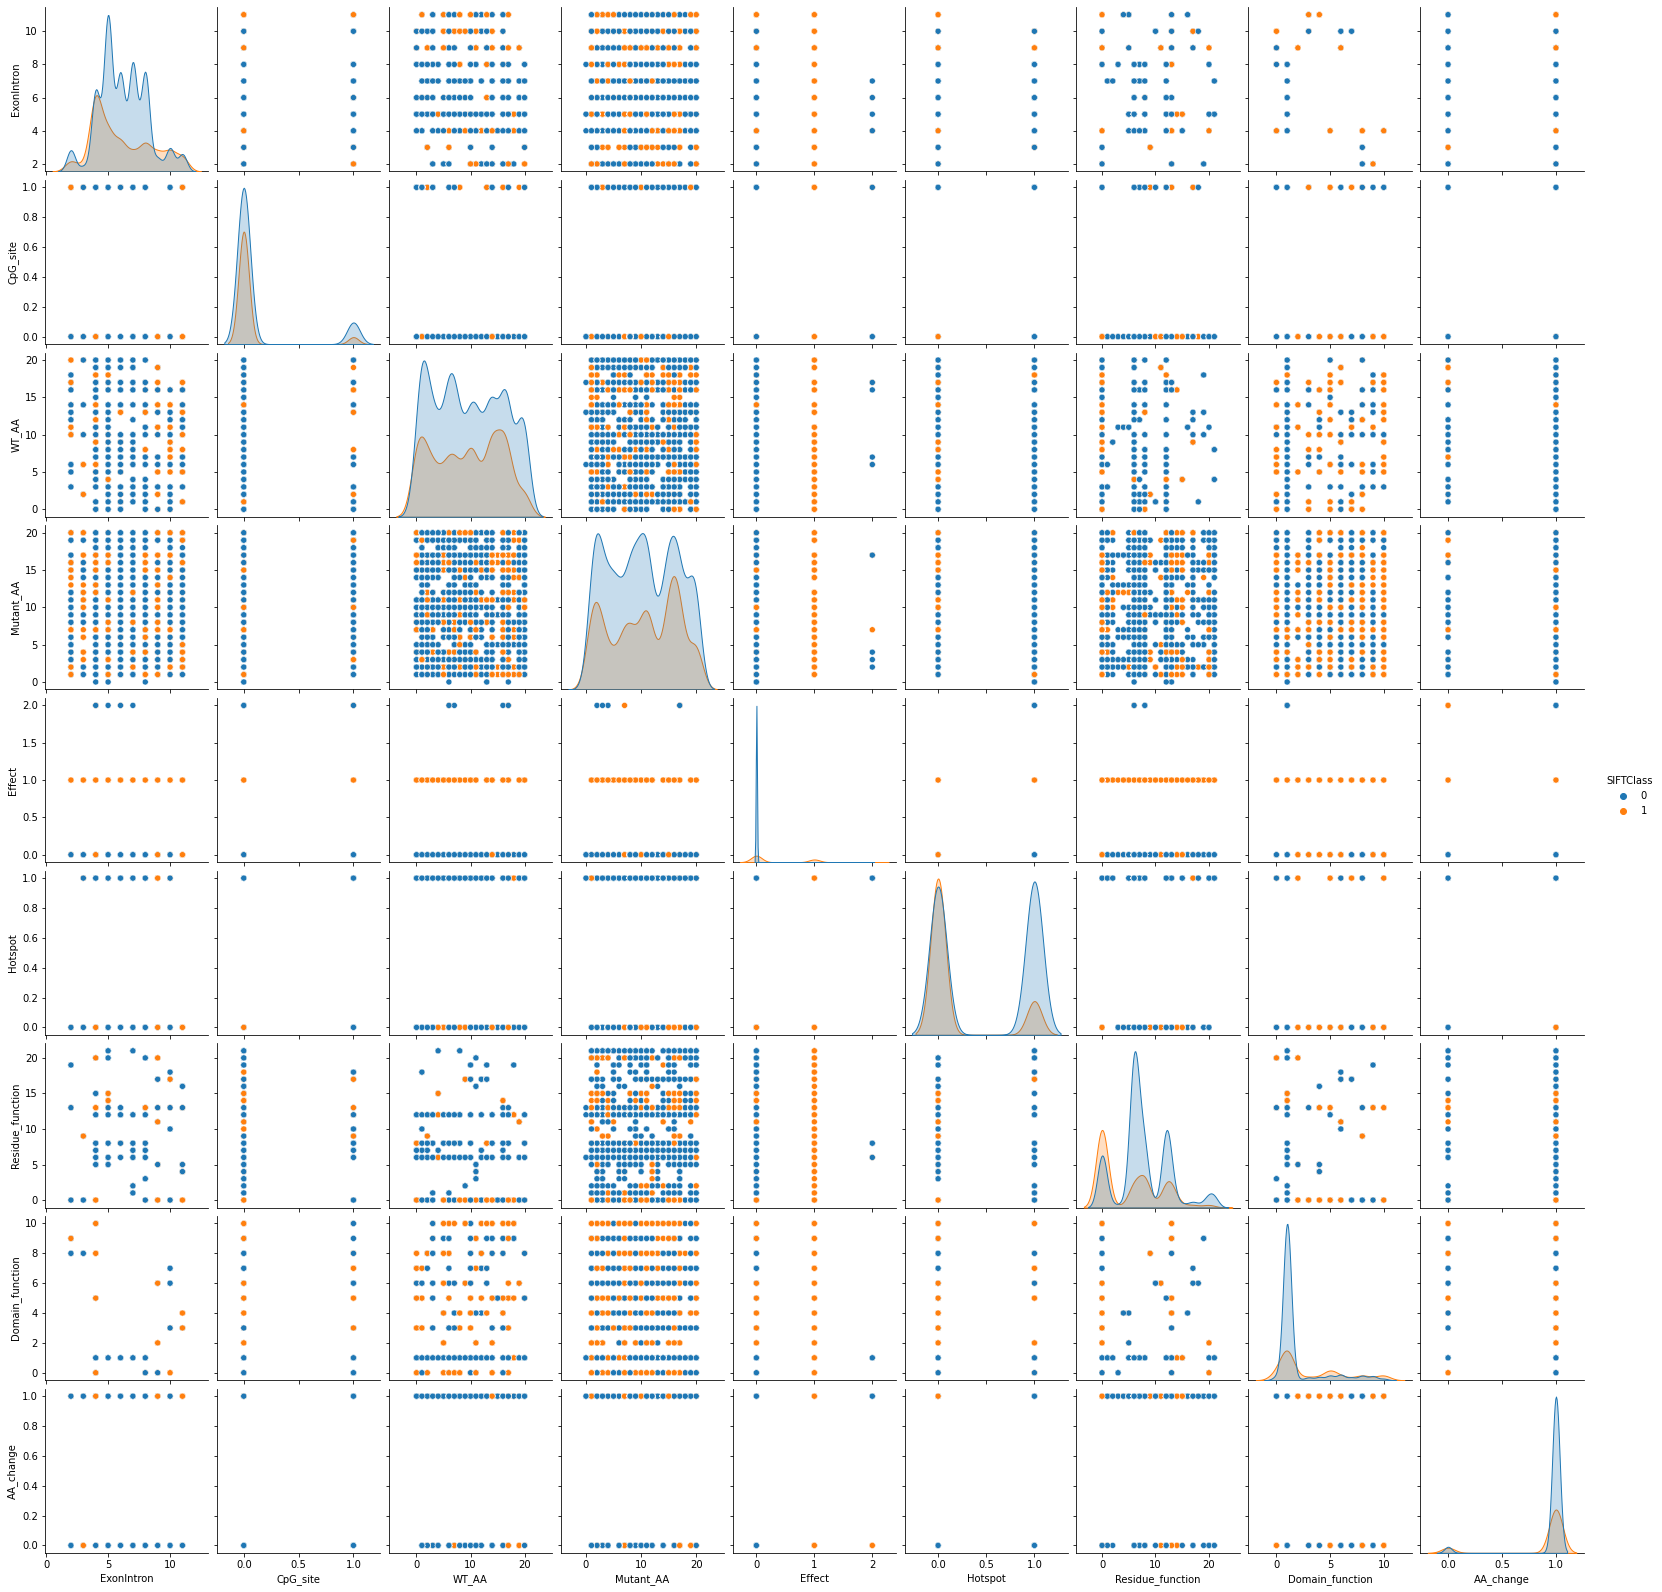

In [74]:
(train_ftrs, test_ftrs,
 train_tgt, test_tgt) = skms.train_test_split(data,
                                              target,
                                              test_size=.25)

sns.pairplot(data, hue="SIFTClass")
# have to change strings to numbers or use type number

In [75]:
kNN_model = neighbors.KNeighborsClassifier(n_neighbors=3)
kNN_fit = kNN_model.fit(train_ftrs, train_tgt)
kNN_predictions = kNN_fit.predict(test_ftrs)
print(kNN_predictions)
kNN_score = metrics.accuracy_score(test_tgt, kNN_predictions)
print(f'kNN model accuracy: {kNN_score:0.2f}')

['Damaging' 'Damaging' 'Damaging' ... 'Damaging' 'Damaging' 'Damaging']
kNN model accuracy: 0.90


In [199]:
# prevalence dataset
prevalence_data = pd.read_csv('data/Prevalence_r20.csv')

prevalence_data = prevalence_data.drop('Prevalence_ID', 1)
prevalence_data = prevalence_data.drop('Topo_code', 1)
prevalence_data = prevalence_data.drop('Morpho_code', 1)
prevalence_data = prevalence_data.drop('Population', 1)
prevalence_data = prevalence_data.drop('Country', 1)
prevalence_data = prevalence_data.drop('Comment', 1)
prevalence_data = prevalence_data.drop('Ref_ID', 1)
prevalence_data = prevalence_data.drop('Cross_Ref_ID', 1)
prevalence_data = prevalence_data.drop('Title', 1)
prevalence_data = prevalence_data.drop('Authors', 1)
prevalence_data = prevalence_data.drop('S_Ref_Year', 1)
prevalence_data = prevalence_data.drop('Journal', 1)
prevalence_data = prevalence_data.drop('Volume', 1)
prevalence_data = prevalence_data.drop('Start_page', 1)
prevalence_data = prevalence_data.drop('End_page', 1)
prevalence_data = prevalence_data.drop('PubMed', 1)
prevalence_data = prevalence_data.drop('Ref_comment', 1)
prevalence_data = prevalence_data.drop('Tissue_processing', 1)
prevalence_data = prevalence_data.drop('Start_material', 1)
prevalence_data = prevalence_data.drop('Prescreening', 1)
prevalence_data = prevalence_data.drop('Material_sequenced', 1)
prevalence_data = prevalence_data.drop('Exclude_analysis', 1)
prevalence_data = prevalence_data.drop('WGS_WXS', 1)

display(prevalence_data)

,Topography,Morphology,Sample_analyzed,Sample_mutated,exon2,exon3,exon4,exon5,exon6,exon7,exon8,exon9,exon10,exon11
0,ESOPHAGUS,"Squamous cell carcinoma, NOS",14,5,False,False,False,True,True,True,True,True,False,False
1,ESOPHAGUS,"Cancer, NOS",10,5,False,False,False,True,True,True,True,False,False,False
2,ESOPHAGUS,"Squamous cell carcinoma, NOS",34,15,False,False,False,True,True,True,True,False,False,False
3,STOMACH,"Cancer, NOS",14,9,False,False,True,True,True,True,True,False,False,False
4,PANCREAS,"Adenocarcinoma, NOS",14,6,False,False,False,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382,OVARY,"Serous cystadenocarcinoma, NOS (C56.9)",126,119,True,True,True,True,True,True,True,True,True,True
2383,OVARY,"Serous cystadenocarcinoma, NOS (C56.9)",4,2,True,True,True,True,True,True,True,True,True,True
2384,OVARY,"Serous cystadenocarcinoma, NOS (C56.9)",15,13,True,True,True,True,True,True,True,True,True,True
2385,ADRENAL GLAND,"Pheochromocytoma, malignant (C74.1)",6,5,True,True,True,True,True,True,True,True,True,True


In [200]:
# number of each topography
prevalence_data['Topography'].value_counts()

BRAIN                                                                     232
BRONCHUS AND LUNG                                                         188
LIVER AND INTRAHEPATIC BILE DUCTS                                         182
BREAST                                                                    182
COLORECTUM, NOS                                                           150
                                                                         ... 
BASE OF TONGUE                                                              1
SPINAL CORD, CRANIAL NERVES, AND OTHER PARTS OF CENTRAL NERVOUS SYSTEM      1
PLACENTA                                                                    1
OTHER AND ILL-DEFINED SITES IN LIP, ORAL CAVITY AND PHARYNX                 1
OTHER AND UNSPECIFIED URINARY ORGANS                                        1
Name: Topography, Length: 70, dtype: int64

In [201]:
# stats on the number of samples analyzed
prevalence_data['Sample_analyzed'].describe()

count    2387.000000
mean       42.607038
std        68.751327
min         1.000000
25%        12.000000
50%        24.000000
75%        49.000000
max      1464.000000
Name: Sample_analyzed, dtype: float64

In [202]:
# stats on the number of analyzed samples that were mutated
prevalence_data['Sample_mutated'].describe()

count    2387.000000
mean       13.345622
std        26.311276
min         0.000000
25%         2.000000
50%         6.000000
75%        15.000000
max       665.000000
Name: Sample_mutated, dtype: float64

In [203]:
print('Percent samples mutated overall: ' + str((sum(prevalence_data['Sample_mutated'])/sum(prevalence_data['Sample_analyzed']))))

Percent samples mutated overall: 0.3132257652183318


In [204]:
# stats on what percent of samples showed mutations based on their topography
mutated_by_topography = prevalence_data.groupby(by=['Topography'])['Sample_analyzed', 'Sample_mutated'].sum()
mutated_by_topography['Percent_mutated'] = [(row.Sample_mutated / row.Sample_analyzed) for index, row in mutated_by_topography.iterrows()]
display(mutated_by_topography.sort_values(by=['Percent_mutated'], ascending=0))

,Sample_analyzed,Sample_mutated,Percent_mutated
Topography,,,
BASE OF TONGUE,2,2,1.000000
TONSIL,3,3,1.000000
"FEMALE GENITAL ORGANS, NOS",42,30,0.714286
OTHER AND UNSPECIFIED FEMALE GENITAL ORGANS,17,12,0.705882
ACCESSORY SINUSES,495,327,0.660606
...,...,...,...
ANUS AND ANAL CANAL,119,5,0.042017
PLACENTA,24,1,0.041667
MENINGES,57,2,0.035088


In [205]:
# stats on what percent of samples showed mutations based on their morphology
mutated_by_morphology = prevalence_data.groupby(by=['Morphology'])['Sample_analyzed', 'Sample_mutated'].sum()
mutated_by_morphology['Percent_mutated'] = [(row.Sample_mutated/row.Sample_analyzed) for index, row in mutated_by_morphology.iterrows()]
display(mutated_by_morphology.sort_values(by=['Sample_analyzed'], ascending=0))

,Sample_analyzed,Sample_mutated,Percent_mutated
Morphology,,,
"Cancer, NOS",21415,7138,0.333318
"Carcinoma, NOS",18551,6283,0.338688
"Squamous cell carcinoma, NOS",11139,4804,0.431277
"Adenocarcinoma, NOS",8460,3145,0.371749
"Hepatocellular carcinoma, NOS (C22.0)",5460,1713,0.313736
...,...,...,...
"Myofibroblastic tumor, NOS",1,1,1.000000
"Paget's disease, mammary (C50._)",1,0,0.000000
"Phyllodes tumor, malignant (C50._)",1,1,1.000000


In [206]:
# stats on what percent of samples showed mutations grouped by both topography and morphology
mutated_by_both = prevalence_data.groupby(by=['Topography', 'Morphology'])['Sample_analyzed', 'Sample_mutated'].sum()
mutated_by_both['Percent_mutated'] = [(row.Sample_mutated/row.Sample_analyzed) for index, row in mutated_by_both.iterrows()]
display(mutated_by_both)

Sample_analyzed  \
Topography        Morphology                                                       
ACCESSORY SINUSES Adenocarcinoma, intestinal type (C16._)                     50   
                  Carcinoma, NOS                                             360   
                  Schneiderian carcinoma (C30.0, C31._)                        7   
                  Spindle cell carcinoma, NOS                                  8   
                  Squamous cell carcinoma, NOS                                70   
...                                                                          ...   
UTERUS, NOS       Serous cystadenocarcinoma, NOS (C56.9)                      27   
VAGINA            Carcinoma, NOS                                              27   
VULVA             Cancer, NOS                                                 38   
                  Squamous cell carcinoma, NOS                               189   
                  Squamous intraepithelial neoplasia, grade III               42   

                                                                 Sample_mutated  \
Topography        Morphology                                                      
ACCESSORY SINUSES Adenocarcinoma, intestinal type (C16._)                    26   
                  Carcinoma, NOS                                            277   
                  Schneiderian carcinoma (C30.0, C31._)                       0   
                  Spindle cell carcinoma, NOS                                 4   
                  Squamous cell carcinoma, NOS                               20   
...                                                                         ...   
UTERUS, NOS       Serous cystadenocarcinoma, NOS (C56.9)                     22   
VAGINA            Carcinoma, NOS                                              6   
VULVA             Cancer, NOS                                                12   
                  Squamous cell carcinoma, NOS                               82   
                  Squamous intraepithelial neoplasia, grade III               8   

                                                                 Percent_mutated  
Topography        Morphology                                                      
ACCESSORY SINUSES Adenocarcinoma, intestinal type (C16._)               0.520000  
                  Carcinoma, NOS                                        0.769444  
                  Schneiderian carcinoma (C30.0, C31._)                 0.000000  
                  Spindle cell carcinoma, NOS                           0.500000  
                  Squamous cell carcinoma, NOS                          0.285714  
...                                                                          ...  
UTERUS, NOS       Serous cystadenocarcinoma, NOS (C56.9)                0.814815  
VAGINA            Carcinoma, NOS                                        0.222222  
VULVA             Cancer, NOS                                           0.315789  
                  Squamous cell carcinoma, NOS                          0.433862  
                  Squamous intraepithelial neoplasia, grade III         0.190476  

[460 rows x 3 columns]

In [209]:
# percent of occurrence for mutations grouped by exon
EXONS = data['ExonIntron'].value_counts(normalize=True)
display(EXONS.sort_index())

2     0.036907
3     0.011135
4     0.191668
5     0.214938
6     0.140123
7     0.136745
8     0.141123
9     0.037658
10    0.051670
11    0.038033
Name: ExonIntron, dtype: float64

In [215]:
# train test split
prevalence_tgt = prevalence_data.Morphology

(prevalence_train_ftrs, prevalence_test_ftrs,
 prevalence_train_tgt, prevalence_test_tgt) = skms.train_test_split(prevalence_data,
                                              prevalence_tgt,
                                              test_size=.25)

In [323]:
prevalence_data_weighted = prevalence_data
for i in range(2, 12):
    prevalence_data_weighted['exon'+str(i)].replace({False: 0, True: EXONS[i]}, inplace=True)

#print([ for v in [values for index, values in prevalence_data_weighted[['exon2', 'exon3', 'exon4', 'exon5', 'exon6', 'exon7', 'exon8', 'exon9', 'exon10', 'exon11']].iterrows()]])